# Titanic Survival Machine Learning Challenge
Source link: https://www.kaggle.com/c/titanic/overview

### By: Lester Phong 

## Contents:
- [1. Import Data](#1.-Import-Data)
- [2. Data Cleaning](#2.-Data-Cleaning)
- [3. Feature Engineering](#3.-Feature-Engineering)
- [4. Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))
    - [4.1. Survival Rate](#4.1.-Survival-Rate)
    - [4.2. Survival By Gender](#4.2.-Survival-by-Gender)
    - [4.3. Age Distribution](#4.3.-Age-Distribution)
    - [4.4. Passenger Class](#4.4.-Passenger-Class)
    - [4.5 Port of Embarkation](#4.5.-Port-of-Embarkation)
    - [4.6 SibSp](#4.6.-SibSp)
    - [4.7 Parch](#4.7.-Parch)
    - [4.8 Family Size](#4.8.-Family-Size)
    - [4.9 Fare Paid](#4.9.-Fare-Paid)
    - [4.10 Correlation Diagram](#4.10.-Correlation-Diagram)
- [5. Modelling](#5.-Modelling)
    - [5.1. K-Nearest Neighbours](#5.1.-K-Nearest-Neighbours)
    - [5.2. Naive Bayes](#5.2.-Naive-Bayes)
    - [5.3. Random Forest](#5.3.-Random-Forest)
- [6. Model Evaluation](#6.-Model-Evaluation)
    - [6.1. Model Selection](#6.1.-Model-Selection)
    - [6.2. Analyze confusion matrix for selected model](#6.2.-Analyze-confusion-matrix-for-selected-model)
    - [6.3. ROC AUC Curve](#6.3.-ROC-AUC-Curve)
- [7. Prediction on Kaggle Test Set](#7.-Prediction-on-Kaggle-Test-Set)


## 1. Import Data

In [309]:
# import the libraries
import pandas as pd
import numpy as np 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Load Data Source

In [310]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [311]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [312]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [313]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on representation of numerical columns alone, there are missing values at first glance since not all columns have 891 datapoints. Notwithstanding missing values in "Age" category, the average age is 29 with the oldest passenger being 80 years of age and the youngest at about 5 months. About 38% of passengers appear to have survived. The biggest family size appears to be 6.

In [314]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [315]:
train["Survived"].unique()

array([0, 1], dtype=int64)

Dataset contains 12 variables and it comprises of 891 datapoints (passengers). Below is a preliminary dictionary of the terms and description for each variable to better understand how to approach the cleaning.</font>
    
<b>Titanic Data Dictionary (before cleaning)</b>
    
|Feature               |Type    |Dataset|Description                               |Class of Data
|:-------------------  |:---    |:-- -|:---                                        |:----
|<b>PassengerId</b>    |integer |Train|Identifier                                  |Discrete
|<b>Survived</b>       |integer |Train|Surival Status. 0=No, 1=Yes                 |Nominal
|<b>Pclass</b>         |integer |Train|Ticket Class. 1=1st, 2=2nd, 3=3rd             |Nominal
|<b>Name</b>           |object  |Train|Passenger Name                              |Nominal
|<b>Sex</b>            |object  |Train|Male or Female                              |Nominal
|<b>Age</b>            |float   |Train|Passenger Age in Years                      |Discrete
|<b>SibSp</b>          |integer |Train|# of siblings / spouses aboard the Titanic  |Discrete
|<b>Parch</b>          |integer |Train|# of parents / children aboard the Titanic  |Discrete
|<b>Ticket</b>         |object  |Train|Ticket number                               |Nominal
|<b>Fare</b>           |float   |Train|Passenger fare                              |Continuous
|<b>Cabin</b>          |object  |Train|Cabin number                                |Nominal
|<b>Embarked</b>       |object  |Train|Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton |Nominal

<ul>
<li>It would appear that variables like the Passenger Id, Passenger Names, Ticket Number are identifiers which have no bearing to predicting a passenger's survivability. </li>
<li>However in particular for Passenger Names, the honorific titles could point to whether the passenger was an adult or child; which in itself could be an important parameter for survival and can be used to solve for missing age values. </li>
<li>Location based variables like the 3-tier passenger class and Cabin Numbers are important as factors to survivability although Cabin Numbers appear to have many tiers and contain a significant number nulls from the sample information. </li>
<li>Certain categorical data such as the sex would need to be enumerated later on for modeling.</li>
    </ul>

## 2. Data Cleaning

#### Check for null values

In [316]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

3 of the variables Age, Cabin and Embarked contains null values with the biggest number under Cabin

Since Embark category only has 2 null values, these rows can be dropped.

In [317]:
train.dropna(subset=['Embarked'], inplace=True)
train['Embarked'].isnull().sum()

0

In [318]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

The Cabin information is much more complex given that close to 80% contain NaNs.

In [319]:
train['Cabin'].nunique()

146

In [320]:
train['Cabin'].value_counts() 

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
D              3
              ..
D9             1
D46            1
D49            1
A19            1
C50            1
Name: Cabin, Length: 146, dtype: int64

Given the values of cabins are multifold at 146 and that majority are empty fields, it would make sense to drop this data column since it won't contribute much to analysis and would entail too much effort to impute any values short of any detailed information being provided.

In [321]:
train.drop('Cabin',axis=1,inplace=True)

In [322]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [323]:
train.shape

(889, 11)

Now let's examine the age values

In [324]:
train['Age'].isnull().sum()/len(train['Age'])

0.19910011248593926

Age has approximately 20% missing values. Imputation would be very tricky here because are clearly different subsets of passengers falling into adults, children and by gender. Wikipedia also states that the passenger class matters from this extract:<br> 
<br>
<i>Titanic's passengers numbered 1,317 people: 324 in first class, 284 in second class, and 709 in third class. Of these, 805 were male and 434 were female; 112 children were aboard, the largest number of which were in third class</i>
<br>
<br>
It would be simple to just impute a mean or median but a precise estimation can be implemented based on the other data information such as the name title, "SibSp" & "ParCh" data. For simplicity, the <u>title</u> will be used as markers to make an intelligent imputation as to the missing age.

First, let's get the median age of males going by the title of "Mr".

In [325]:
train[train['Name'].str.contains('Mr.')].groupby('Sex')['Age'].median()

Sex
female    35.0
male      30.0
Name: Age, dtype: float64

Then we find median age of females going by the title of "Miss" or "Mrs".

In [326]:
train[train['Name'].str.contains('Miss.|Mrs.')].groupby('Sex')['Age'].median()

Sex
female    27.0
Name: Age, dtype: float64

Then we find median age of males going by the title of "Master" to indicate male children.<br>Since female children are addressed as "Miss", we will use the same age as for male children with the additional condition that "Parch" must hold a value

In [327]:
train[train['Name'].str.contains('Master')].groupby('Sex')['Age'].median()

Sex
male    3.5
Name: Age, dtype: float64

For simplicity sake, we can assign: 
<ul>
<li>Age of 30 to any missing age group with title of "Mr" (Adult Male)
<li>Age of 27 to any missing age group with title of "Mrs" (Adult Female)
<li>Age of 3.5 to any missing age group with the title of "Master" (Male & Female Children) with a parent class
    </ul>

In [328]:
cond1 = (train['Sex'] == 'female') & (train["Name"].str.contains('Miss.|Mrs.')) & (train["Parch"] == 0) 
cond2 = (train['Name'].str.contains('Master')) & (train['Sex']=='male')
cond3 = (train['Name'].str.contains('Miss.')) & (train['Sex'] == 'female') & (train['Parch'] > 0)
cond4 = (train['Name'].str.contains('Mr.')) & (train['Sex'] == 'male')

In [329]:
train.loc[cond1, "Age"] = train.loc[cond1, "Age"].fillna(27)
train.loc[cond2, "Age"] = train.loc[cond2, "Age"].fillna(3.5)
train.loc[cond3, "Age"] = train.loc[cond3, "Age"].fillna(3.5)
train.loc[cond4, "Age"] = train.loc[cond4, "Age"].fillna(30)

In [330]:
train.isnull().sum().sort_values(ascending=False)

Age            4
Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

4 still remain that did not fit into the conditions. 3 of the females could be juveniles that were given title of Mrs while the last Male has the title of Doctor and is an adult.

In [331]:
train[(train['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C


In [332]:
cond5 = (train['Name'].str.contains('Mrs.')) & (train['Sex'] == 'female') & (train['Parch'] > 0)
cond6 = (train['Name'].str.contains('Dr.')) & (train['Sex'] == 'male') 

In [333]:
train.loc[cond5, "Age"] = train.loc[cond5, "Age"].fillna(27)
train.loc[cond6, "Age"] = train.loc[cond6, "Age"].fillna(30)

In [334]:
train.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [335]:
train.shape

(889, 11)

#### Clean Test Set

In [336]:
test.drop('Cabin', axis=1,inplace=True)

In [337]:
cond1A = (test['Sex'] == 'female') & (test["Name"].str.contains('Miss.|Mrs.|Ms.')) & (test["Parch"] == 0) 
cond2A = (test['Name'].str.contains('Master')) & (test['Sex']=='male')
cond3A = (test['Name'].str.contains('Miss.')) & (test['Sex'] == 'female') & (test['Parch'] > 0)
cond4A = (test['Name'].str.contains('Mr.')) & (test['Sex'] == 'male')
cond5A = (test['Name'].str.contains('Mrs.')) & (test['Sex'] == 'female') & (test['Parch'] > 0)

test.loc[cond1A, "Age"] = test.loc[cond1A, "Age"].fillna(27)
test.loc[cond2A, "Age"] = test.loc[cond2A, "Age"].fillna(3.5)
test.loc[cond3A, "Age"] = test.loc[cond3A, "Age"].fillna(3.5)
test.loc[cond4A, "Age"] = test.loc[cond4A, "Age"].fillna(30)
test.loc[cond5A, "Age"] = test.loc[cond5A, "Age"].fillna(27)

In [338]:
test.isnull().sum().sort_values(ascending=False)

Fare           1
Embarked       0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

## 3. Feature Engineering

Deal with the categorical data by encoding or dummifying the values

#### Dummify Place of Embarkation

In [339]:
train = pd.get_dummies(train, columns=['Embarked'])

#### Dummify the Ticket Class

In [340]:
train = pd.get_dummies(train, columns=['Pclass'])

#### Encode Gender

In [341]:
train['IsMale'] = train['Sex'].map(lambda x: 1 if x == 'male' else 0)
train.drop('Sex', axis=1, inplace=True)

#### Extract the titles from the Name field

In [342]:
train['Title'] = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [343]:
train['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Capt              1
Don               1
Mme               1
Sir               1
the Countess      1
Ms                1
Lady              1
Name: Title, dtype: int64

The titles can be considered to be quite an important factor as well as it possibly points to distinctions such as the ship staff or the more distinguished guests on board, which might play a part in the ship location at the point of the disaster. As such, the titles will be divided under a smaller number of categories which comprise of the 4 classes:
<ul>
    <li>Mr</li>
    <li>Mrs</li>
    <li>Miss</li>
    <li>Child</li>
    <li>Crew</li>
    <li>Nobility</li>
</ul>

#### Map the Titles

In [344]:
title_map = {"Mr": 'Mr', "Miss": 'Miss', "Mrs": 'Mrs', 
                 "Master": 'Child', "Dr": 'Crew', "Rev": 'Mr', "Major": 'Crew', "Col": 'Crew', "Mlle": 'Miss', "Lady": 'Nobility',"Don": 'Nobility', 
                 "Ms": 'Mrs', "Capt": 'Crew',"Countess": 'Nobility',"Sir": 'Nobility', "Jonkheer": 'Nobility', "Mme": 'Miss' }

train['Title'] = train['Title'].map(title_map)

In [345]:
train['Title'].value_counts()

Mr          523
Miss        184
Mrs         125
Child        40
Crew         12
Nobility      4
Name: Title, dtype: int64

In [346]:
train = pd.get_dummies(train, columns=['Title'])

Lastly, let's create a new variable which consolidates the SibSp and Parch numbers under family size as everyone would be likely to be all staying together in the same cabin. And the family size might also determine the difficulty of escaping or surviving.

In [347]:
train['FamilyCount'] = train['Parch'] + train['SibSp']

#### Drop features that are not significant for analysis

For simplicity sake, the fare will also be removed since an in-depth analysis would not be performed on it.

In [348]:
train.drop(['PassengerId','Ticket','Name','Fare'],axis=1,inplace=True)

It also seems that there are no "nobility" present in the test set, therefore this feature will be dropped as well.

In [349]:
train.drop('Title_Nobility',axis=1,inplace=True)

In [350]:
train.head()

,Survived,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,IsMale,Title_Child,Title_Crew,Title_Miss,Title_Mr,Title_Mrs,FamilyCount
0,0,22.0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,1,26.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,1,35.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1
4,0,35.0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


#### Apply feature Engineering for the Test Set

In [351]:
test = pd.get_dummies(test, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Pclass'])

test['IsMale'] = test['Sex'].map(lambda x: 1 if x == 'male' else 0)
test.drop('Sex', axis=1, inplace=True)

test['Title'] = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = test['Title'].map(title_map)

test = pd.get_dummies(test, columns=['Title'])

test['FamilyCount'] = test['Parch'] + test['SibSp']

# Drop same features except for PassengerId which is a field necessary for the kaggle submission
test.drop(['Ticket','Name','Fare'], axis=1,inplace=True)

In [352]:
test.head()

,PassengerId,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,IsMale,Title_Child,Title_Crew,Title_Miss,Title_Mr,Title_Mrs,FamilyCount
0,892,34.5,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
1,893,47.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
2,894,62.0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,895,27.0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
4,896,22.0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,2


## 4. Exploratory Data Analysis (EDA)

In [510]:
df = pd.read_csv('train.csv')

### 4.1. Survival Rate

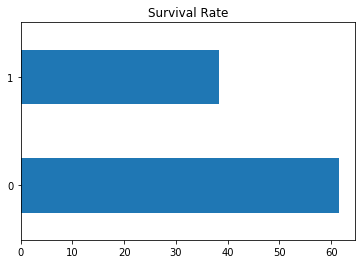

In [461]:
# Examine Survival Rate
(df.Survived.value_counts(normalize=True) * 100).plot.barh().set_title('Survival Rate');  

There was a 38% overall survivor rate.

### 4.2. Survival by Gender

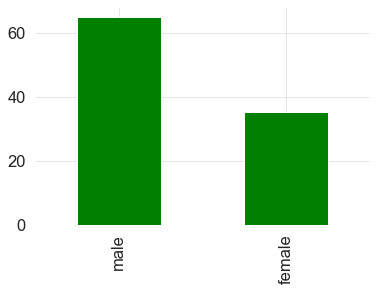

In [490]:
# Breakdown by Gender
sex_count = (df.Sex.value_counts(normalize = True) * 100).plot.bar()

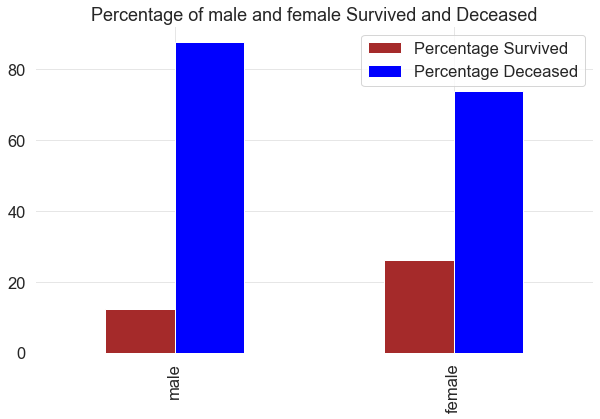

In [482]:
# Alive Percentage
male_survived = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female_surived = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)

# Deceased Percentage
male_deceased = 100-male_survived
female_deceased = 100-female_surived 

df_gender = pd.DataFrame(
    { "Percentage Survived":{"male": male_survived,"female": female_surived},  "Percentage Deceased":{"male": male_deceased,"female": female_deceased}})

df_gender.plot.bar().set_title("Percentage of male and female Survived and Deceased");

The number of males onboard the titanic was significantly larger (approximately 65%) than the number of females. However, males were more likely to perish within their own groups as compared to females. More than 80% of the males perished while it was about 70% for females.

### 4.3. Age Distribution

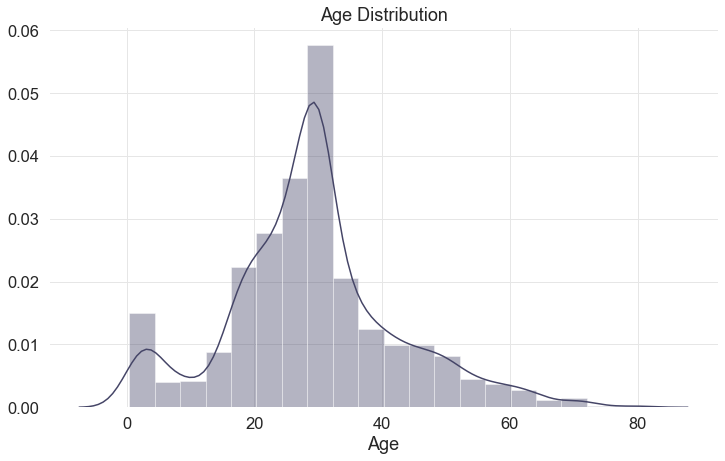

In [541]:
sns.distplot(train['Age'].dropna(),color='#454567',bins=20).set_title("Age Distribution");

The age range after imputation of is approximately normally distributed with a slight right skew which suggest some outliers of very old passengers. Overall the majority age range of passengers onboard the Titanic appear to be between the ages 18-40 years of age.

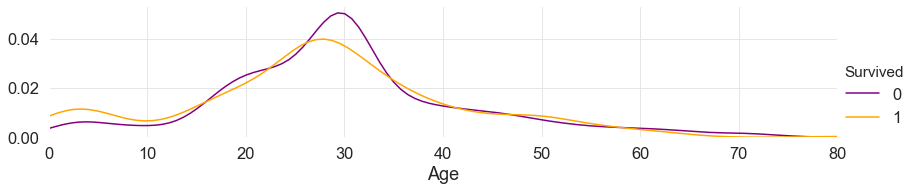

In [543]:
Age_Survived = sns.FacetGrid(train, hue="Survived",aspect=4)
Age_Survived.map(sns.kdeplot,'Age')

Age_Survived.set(xlim=(0, train['Age'].max()))

Age_Survived.add_legend()
plt.show() 

It would appear that the distribution of both the survivors and deceased seems to loosely follow the profile of the age distribution. Most of the survivors and deceased seem to be of the 18-40 year age range as well and thus the peak values appear to be due to an effect by majority. Comparing the survival and deceased patterns, there does not seem to be deep insight since both ahdere to the same shape. It can be inferred that young adults have the greatest chance of survival although it also could be due to young adults forming majority of the passengers.

### 4.4. Passenger Class

In [517]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [531]:
df.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

More than half of the passengers were located in Class 3 cabins

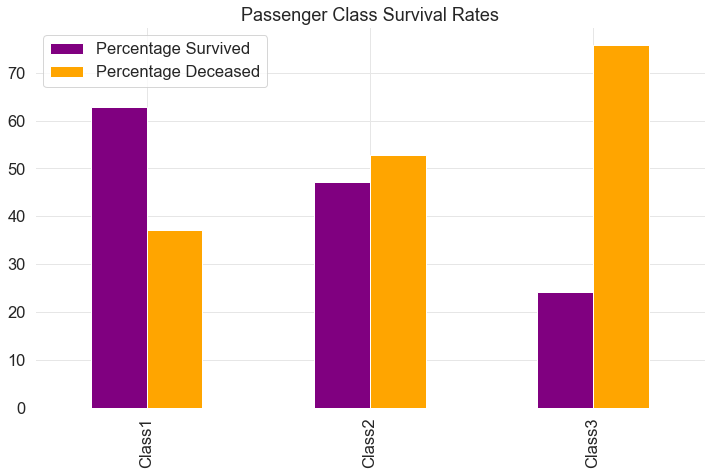

In [532]:
# Alive Percentage
Class1_survived = round((df[df.Pclass == 1].Survived == 1).value_counts()[1]/len(df[df.Pclass == 1]) * 100, 2)
Class2_survived = round((df[df.Pclass == 2].Survived == 1).value_counts()[1]/len(df[df.Pclass == 2]) * 100, 2)
Class3_survived = round((df[df.Pclass == 3].Survived == 1).value_counts()[1]/len(df[df.Pclass == 3]) * 100, 2)

# Deceased Percentage
Class1_deceased = 100-Class1_survived
Class2_deceased = 100-Class2_survived 
Class3_deceased = 100-Class3_survived 

df_class = pd.DataFrame(
    { "Percentage Survived":{"Class1": Class1_survived,"Class2": Class2_survived,"Class3": Class3_survived},  "Percentage Deceased":{"Class1": Class1_deceased,"Class2": Class2_deceased,"Class3": Class3_deceased}})

df_class.plot.bar().set_title("Passenger Class Survival Rates");

It is observed that passengers residing in Class 1 had significantly higher numbers of survival while the direct opposite applied to Class 3. More than 60% of the Class 1 passengers managed to escape while in stark contrast, more 70% of the passengers in Class 3 did not survive. Class 2 passengers had alnost comparable mortality rates with sightly less than half surviving. Overall, most of the losses are attributed to Class 3.

### 4.5. Port of Embarkation

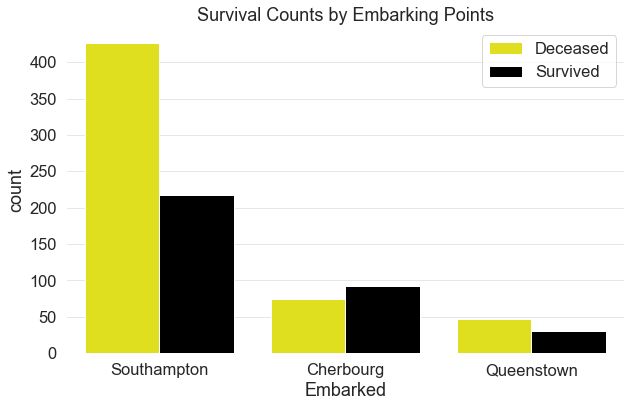

In [609]:
embark_plot = sns.countplot(df['Embarked'], hue = "Survived", data = df)
embark_plot.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
embark_plot.legend(labels = ["Deceased", "Survived"])
embark_plot.set_title("Survival Counts by Embarking Points");

According to the plot, the biggest portion of passengers boarded from Southampton as compared to the the very small numbers embarked at Cherbourg or Queenstown. The fatality rates for passengers from Southampton was also overwhelmingly high compared to the other 2 destinations, more than half perished for Southampton passengers. This deserves a deeper look as the which passenger ticket classes each destination held.

In [612]:
de = df.groupby(['Embarked','Pclass'])['Pclass'].count().to_frame()
de

Pclass
Embarked Pclass        
C        1           85
         2           17
         3           66
Q        1            2
         2            3
         3           72
S        1          127
         2          164
         3          353

It looks like most of the Southampton onboarders were Class 3 ticket holders and that alone comprises 40% of the passengers. This is directly related to the cabin allocation and ship location points to a more plausible reason behind the high deaths for passengers who embarked from Southampton.

### 4.6. SibSp

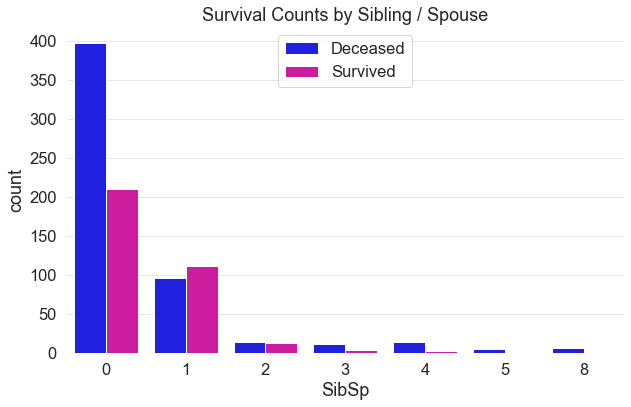

In [617]:
embark_plot = sns.countplot(df['SibSp'], hue = "Survived", data = df)
embark_plot.legend(labels = ["Deceased", "Survived"])
embark_plot.set_title("Survival Counts by Sibling / Spouse");

The results are quite intriguing and show that if one has no spouse or siblings, the more unlikely the passenger is able to survive. The chances of survival diminishes close to 30%. The odds are better for passengers with 1 or 2 spouse or siblings, where there is almost a 50-50 chance of survival.

### 4.7. Parch

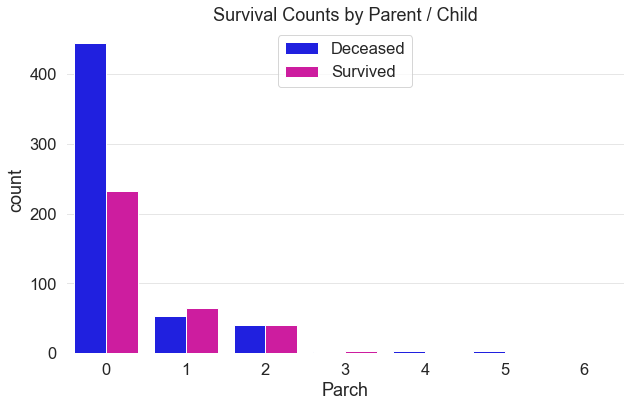

In [618]:
embark_plot = sns.countplot(df['Parch'], hue = "Survived", data = df)
embark_plot.legend(labels = ["Deceased", "Survived"])
embark_plot.set_title("Survival Counts by Parent / Child");

The observation for parent/child adheres quite closely to the sibling/spouse survival trend. Here, a passenger without a parent or a child is more likely to perish with the survival chance also at 30%. The odds are better for passengers with 1 or 2 parents or children, where there is almsot 50-50 chance of survival.

### 4.8. Family Size

Family size is a combination of both the "SibSp" and "Parch" values and will be studied to see if a family unit size would have any bearing on the survival numbers.

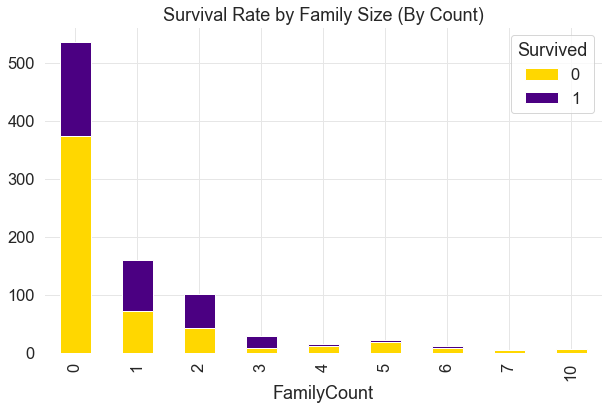

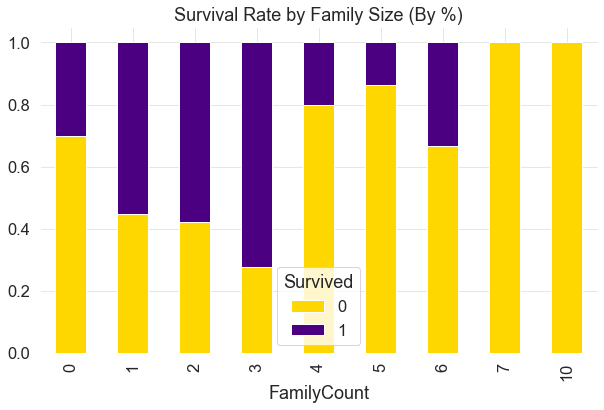

In [580]:
# Family Size Survival (By Count)
f1 = pd.crosstab(train['FamilyCount'], train['Survived'])
f1.plot(kind='bar', stacked=True, title="Survival Rate by Family Size (By Count)")

# Family Size Survival (By Percentage)
f2 = pd.crosstab(train['FamilyCount'], train['Survived'], normalize='index')
f2.plot(kind='bar', stacked=True, title="Survival Rate by Family Size (By %)");

Single travellers without family seem to be the majority, perhaps they could be tourists.There does appear to be a correlation between family size and survival rates. Generally, a family size of 3 has the greatest chance of survival. In fact, there is a better chance of survival for family sizes of 3 or less. Conversely, bigger families with 4 or more members have slimmer chances of survival and generally above 7 has negligible possiblity of survival. One thing to note is that family sizes above 3 comprised of a very small fraction of the total number of passengers.

### 4.9. Fare Paid

Although fare has not been included as a parameter for the modelling, nevertheless it would be good to see if the survivability has any relation to the fare paid. 

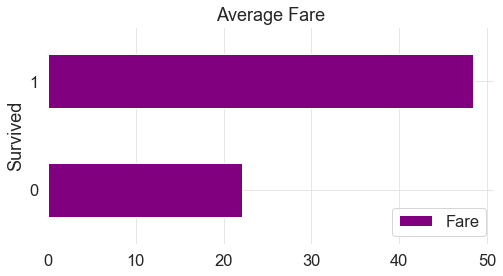

In [583]:
df.groupby('Survived').mean()[['Fare']].plot(kind='barh')
plt.title('Average Fare');

It does appear that the higher fare you pay on average, the greater the chances of survivability. This is pretty much accounted for in by looking at the Passenger Class. However if one were to go to a more granular level, since the cabin data isn't included, it might be worthy to be used as a marker to the precise cabin location instead of using the cabin numbers (which had to be discarded due to excessive null values and too many naming conventions).

### 4.10. Correlation Diagram

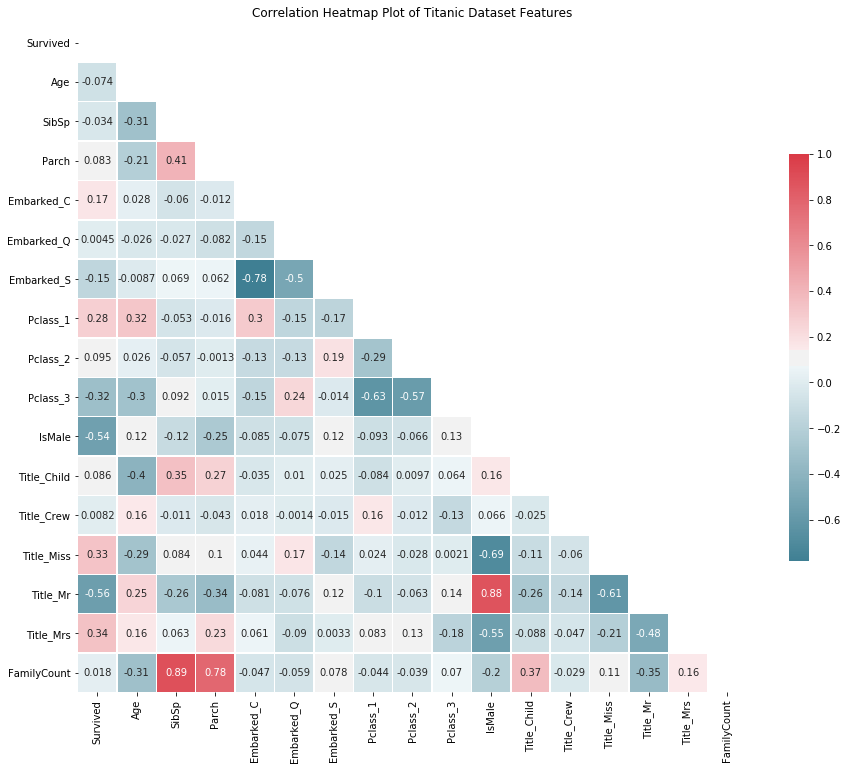

In [382]:
corr = train.corr()
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap=cmap, 
            linewidths=.5, cbar_kws={'shrink':0.5})
plt.title('Correlation Heatmap Plot of Titanic Dataset Features')
plt.show()

From the correlation map, it can observed that:
<ul>
    <li>Gender plays a significant part in determining survivability as observed from IsMale and Mr scoring over 0.5 positive correlation.</li>
    <li>Other noteworthy factor would be the ticket class since Passenger Class 1 & 3 seem to have a degree of positive correlation as well. First class, reserved for the premium guests was located on a much higher deck level than the other 2 classes. Class 3, which was mostly comprised of the less well-to-do passengers was located at the lowest level. At the point of the disaster, the forward lower deck was first to be flooded.</li> 
        <li>This matches with the suvival percentage of the passengers in Class 1, 2 & 3. The more premium passengers in luxury cabins had a higher percentage of survival. </li>
    <li>The rest of the strong correlations are among similar categories and as such, exhibit strong collinearity.</li>
</ul>   

## 5. Modelling

For the purposes of this project, 3 classification methods used to derive the best model. Hence the following testing steps will be performed in this sequence:
<ul>
<li>K_Nearest Neighbours Classifier</li>
<li>Gaussian Naive Bayes Classifer</li>
<li>Random Forest Classifer</li>
</ul>
GridSearchCV will be used to perform hyper parameter tuning in order to determine the optimal values for a given model

In [48]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

### Setting predictor and target variables

In [232]:
# Set the train and target variables
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [233]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

### 5.1. K-Nearest Neighbours

In [51]:
knn = KNeighborsClassifier()

pipe_knn = Pipeline([('std', StandardScaler()),
                     ('knn', knn)])

In [52]:
#Create pipeline for KNN
param_grid_knn = [{'knn__n_neighbors': list(range(1, 15)),
                   'knn__p': [1, 2],
                   'knn__weights': ['uniform','distance'],
                   'knn__metric': ['euclidean','manhattan'],
                   'knn__leaf_size': [5,10,30,50]}]

grid_knn = GridSearchCV(pipe_knn,param_grid=param_grid_knn,scoring='accuracy',cv=5, verbose = 1, n_jobs=-1)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 2240 out of 2240 | elapsed:    7.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             i

In [53]:
# Prediction on validation test data
grid_knn.score(X_test, y_test)

0.8258426966292135

In [54]:
grid_knn.best_params_

{'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 11,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [55]:
# best score on the training data which has undergone cross-validation
grid_knn.best_score_

0.8269870974096326

In [56]:
# Retrieve the best hyperparameters values and retrain the model
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=1,
                                      weights='uniform'))],
         verbose=False)

In [57]:
knn_y_pred = best_knn.predict(X_test)
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.82      0.69      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



### 5.2. Naive Bayes

In [58]:
pipe_gb = Pipeline([
    ('gb', GaussianNB())
])

In [59]:
param_grid_gb = {
    #Portion of the largest variance of all features that is added to variances for calculation stability.
    'gb__var_smoothing': np.logspace(0,-9, num=100)    
}
grid_gb = GridSearchCV(pipe_gb, param_grid=param_grid_gb, cv=5, verbose =1, n_jobs=-1)
grid_gb.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gb',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gb__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [60]:
# Prediction on validation test data
grid_gb.score(X_test, y_test)

0.8202247191011236

In [61]:
grid_gb.best_params_

{'gb__var_smoothing': 0.003511191734215131}

In [62]:
# best score on the training data which has undergone cross-validation
grid_gb.best_score_

0.8185560917955284

In [63]:
# Retrieve the best hyperparameters values and retrain the model
best_gb = grid_gb.best_estimator_
best_gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gb',
                 GaussianNB(priors=None, var_smoothing=0.003511191734215131))],
         verbose=False)

In [375]:
gb_y_pred = best_gb.predict(X_test)
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.81      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



### 5.3. Random Forest 

In [65]:
rf = RandomForestClassifier()

In [66]:
#Create pipeline for Random Forest

param_grid_rf  = [{'n_estimators': [5,8,10,15],
                   'min_samples_split': [5,10,20], 
                   'max_features': ['auto'],
                   'max_depth':[1,5,10],
                   'min_samples_leaf': [1,2,3],
                   'bootstrap':[True]}] 

grid_rf = GridSearchCV(rf,param_grid=param_grid_rf,scoring='accuracy',cv=5,verbose = 1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [67]:
# Prediction on validation test data
grid_rf.score(X_test, y_test)

0.8258426966292135

In [68]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 15}

In [69]:
# best score on the training data which has undergone cross-validation
grid_rf.best_score_

0.8298236974293312

In [70]:
# Retrieve the best hyperparameters values and retrain the model
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rf_y_pred = best_rf.predict(X_test)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        68

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



## 6. Model Evaluation

### 6.1. Model Selection

In [72]:
result =[['KNN',grid_knn.best_score_,grid_knn.score(X_train, y_train),grid_knn.score(X_test, y_test)],['Naive Bayes',grid_gb.best_score_,grid_gb.score(X_train, y_train),grid_gb.score(X_test, y_test)],['Random Forest',grid_rf.best_score_,grid_rf.score(X_train, y_train),grid_rf.score(X_test, y_test)]]
score = pd.DataFrame(result, columns=['Model', 'Best Score', 'Train Accuracy', 'Test Accuracy'])
score

,Model,Best Score,Train Accuracy,Test Accuracy
0,KNN,0.826987,0.832630,0.825843
1,Naive Bayes,0.818556,0.821378,0.820225
2,Random Forest,0.829824,0.835443,0.831461


From the findings above, it appears the random forest method produces the highest accuracy amongst all the models but there is only approximate 1% difference in test accuracy. Naive Bayes had the lowest delta between the pre-train scores and test scores which suggest that it does not overfit too much and is the option that will best generalize the dataset. Therefore, the Naive Bayes model will be selected for the test data prediction.

### 6.2. Analyze confusion matrix for selected model

In [370]:
predictions = best_gb.predict(X_test)

In [371]:
# Generate a confusion matrix.
confusion_matrix(y_test, predictions)

array([[99, 11],
       [20, 48]], dtype=int64)

In [372]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('')

accuracy = (tp+tn)/(tp+fp+fn+tn)
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

print('Accuracy: ', round(accuracy, 2))
print('Recall: ', round(recall, 2))
print('Specificity: ', round(specificity, 2))
print('Precision: ', round(precision, 2))

True Negatives: 99
False Positives: 11
False Negatives: 20
True Positives: 48

Accuracy:  0.83
Recall:  0.71
Specificity:  0.9
Precision:  0.81


In [374]:
gb_y_pred = best_gb.predict(X_test)
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.81      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



### 6.3. ROC AUC Curve

In [363]:
# Create dataframe contains list of true values of our test set and predicted probabilities based on best model.
pred_proba = [i[1] for i in best_gb.predict_proba(X_test)]
pred_df = pd.DataFrame({'survival_values': y_test, 
                        'pred_probs':pred_proba})
pred_df

,survival_values,pred_probs
127,1,0.177691
400,1,0.159140
399,1,0.683303
570,1,0.249543
78,1,0.607721
...,...,...
702,0,0.716882
51,0,0.183743
821,1,0.172479
97,1,0.445349


In [364]:
roc_auc_score(pred_df['survival_values'], pred_df['pred_probs'])

0.8001336898395722

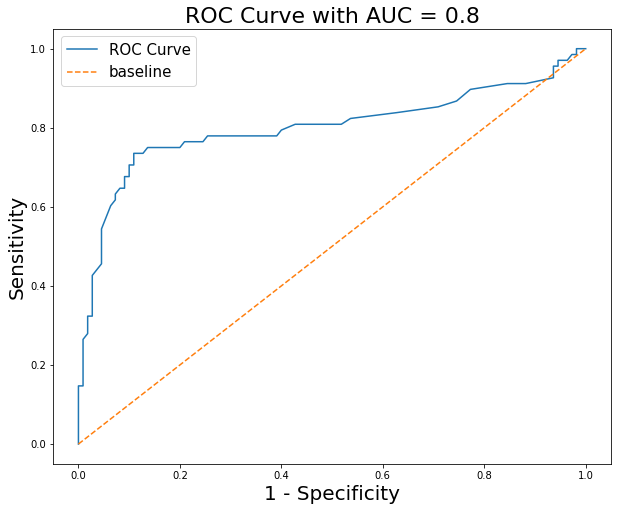

In [379]:
plt.figure(figsize = (10,8))

thresholds = np.linspace(0, 1, 200)

# Sensitivity: True positive rate
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# 1 - specificity: False positive rate
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'survival_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'survival_values', 'pred_probs', prob) for prob in thresholds]

plt.plot(fpr_values,
         tpr_values,
         label='ROC Curve')

# Basline
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["survival_values"], pred_df["pred_probs"]),3)}', 
          fontsize=22)
plt.ylabel('Sensitivity', fontsize=20)
plt.xlabel('1 - Specificity', fontsize=20)

plt.legend(fontsize=15);

There is a ROC-AUC score of 0.80

## 7. Prediction on Kaggle Test Set

In [353]:
# PassengerId column needs to be excluded from predictive model input and will be stored in a separate dataframe temporarily
id = pd.DataFrame(test['PassengerId'].values)
test.drop('PassengerId',axis=1,inplace=True)
id.head(5)

,0
0,892
1,893
2,894
3,895
4,896


In [354]:
# Predict the target variables on test set
dp_pred = best_gb.predict(test)

In [355]:
# Verify that the number of test results are correct
kaggle_result = pd.DataFrame(dp_pred)

In [356]:
# Append back the Id labels
kaggle_result = pd.concat([id,pd.DataFrame(dp_pred)],axis=1)

In [357]:
# Rename columns in accordance with submission requirements
kaggle_result.columns = ['PassengerId','Survived']

In [358]:
# Verify final integrity and format of the submission data
kaggle_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [359]:
kaggle_result.to_csv('./titanic_submission_final.csv', index=False)

### Prediction Results

Achieved 78.2% accuracy on the kaggle platform.